# Titanic Data Survival Prediction
## Bharat Intern Task 2
Take Titanic dataset and predict the chances of survival.
### -----  Ashlesha Baral

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


In [2]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df[df['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


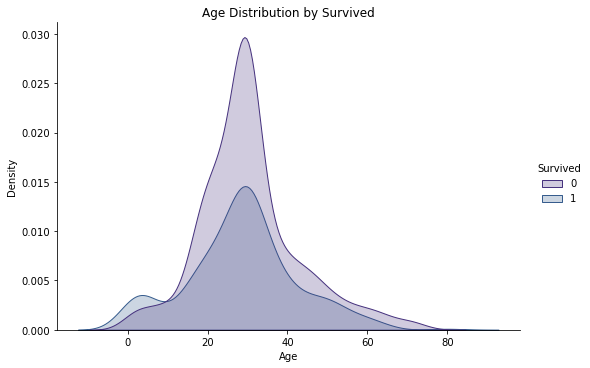

In [9]:
pal = "viridis"
sns.displot(data=df, x='Age', hue='Survived', kind='kde', fill=True, palette=sns.color_palette(pal)[:2], height=5, aspect=1.5)
plt.title('Age Distribution by Survived')
plt.show()

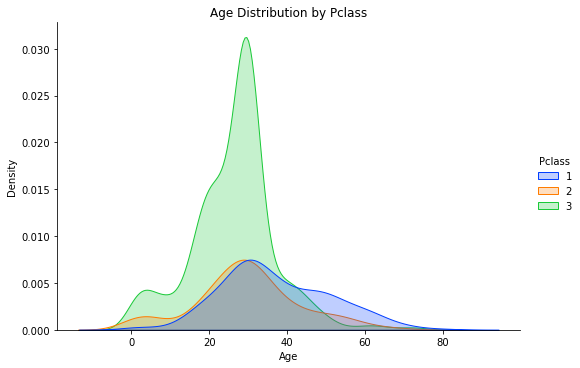

In [10]:
pal = "viridis"
sns.displot(data=df, x='Age', hue='Pclass', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('Age Distribution by Pclass')
plt.show()

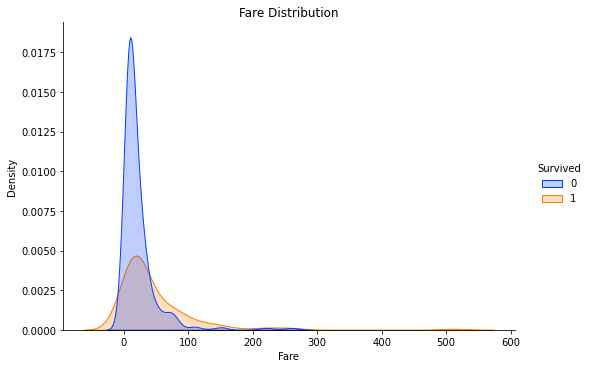

In [11]:
sns.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Fare Distribution')
plt.show()

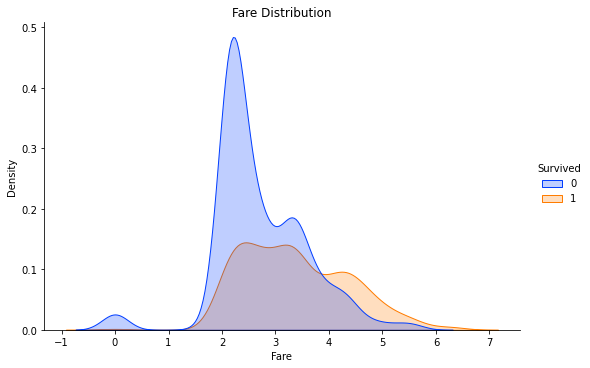

In [12]:
df['Fare_org']=df['Fare']
df['Fare'] = np.log(df['Fare']+1)
sns.displot(data=df, x='Fare', hue='Survived', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)
plt.title('Fare Distribution')
plt.show()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

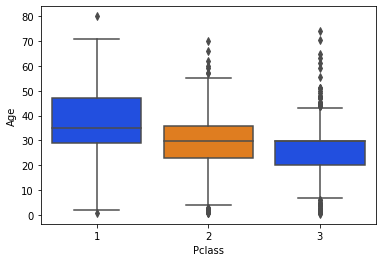

In [13]:
sns.boxplot(x="Pclass",y="Age",data=df,palette=sns.color_palette('bright')[:2])

<AxesSubplot:xlabel='Pclass', ylabel='Fare_org'>

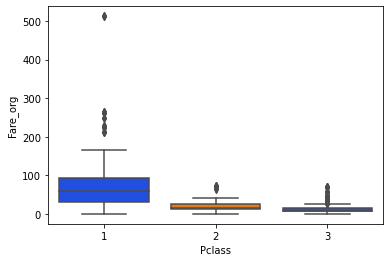

In [14]:
sns.boxplot(x="Pclass",y="Fare_org",data=df,palette=sns.color_palette('bright')[:2])

Text(0.5, 1.0, 'Correlation Matrix')

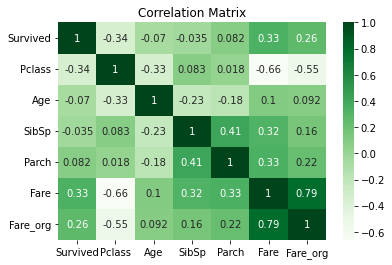

In [15]:
df_corr = df.drop(['PassengerId'], axis = 1)
sns.heatmap(df_corr.corr(),annot = True, cmap = plt.cm.Greens)
plt.title('Correlation Matrix')

Text(0.5, 1.0, 'PairPlot')

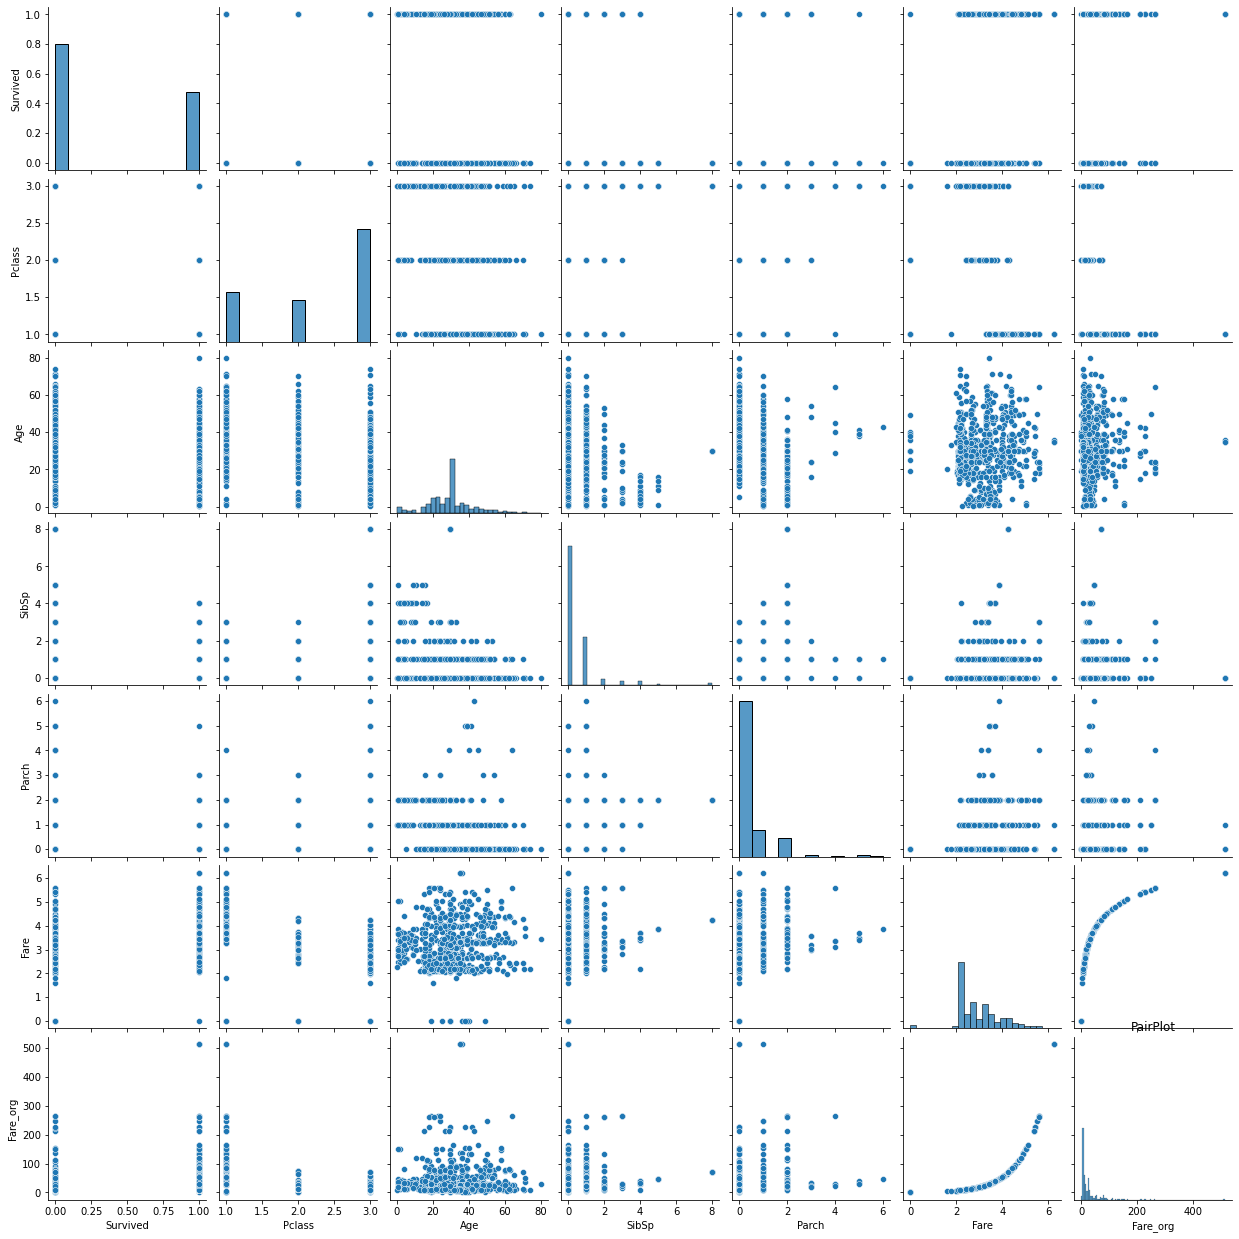

In [16]:
sns.pairplot(data=df_corr )
plt.title('PairPlot')

In [17]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin','Fare_org'], axis=1)
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,2.110213,2
1,2,1,1,0,38.0,1,0,4.280593,0
2,3,1,3,0,26.0,0,0,2.188856,2
3,4,1,1,0,35.0,1,0,3.990834,2
4,5,0,3,1,35.0,0,0,2.202765,2


In [18]:
train_df = df.sample(frac=0.7, random_state=25)
test_df = df.drop(train_df.index)

In [19]:
train_df.head()
X = train_df.drop(columns=['PassengerId', 'Survived'], axis=1)
y = train_df['Survived']

In [20]:
from sklearn.model_selection import train_test_split, cross_val_score
def classify(model):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
    model.fit(x_train, y_train)
    print('Accuracy:', model.score(x_test, y_test))
    
    score = cross_val_score(model, X, y, cv=5)
    print('CV Score:', np.mean(score))

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model)

Accuracy: 0.8333333333333334
CV Score: 0.7948774193548387


In [22]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model)

Accuracy: 0.7628205128205128
CV Score: 0.7499483870967742


In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
classify(model)

Accuracy: 0.8076923076923077
CV Score: 0.7997290322580646


In [24]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
classify(model)

Accuracy: 0.7884615384615384
CV Score: 0.7740645161290323
